In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def print_precision_recall(labels, preds):
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))
    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))
    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))
    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import funzioni as fz
def print_cm(labels, preds):
    classes = ['Noise', 'Signal']
    cm=confusion_matrix(labels, preds)
    fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
hists=pd.read_pickle('histograms.pkl')

In [4]:
hists.head(10)

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,768,769
0,25791,25773,25742,25782,25782,25773,25791,25787,25769,25773,...,25751,25742,25778,25787,25760,25769,25782,25769,25769,0
1,25755,25782,25769,25791,25746,25782,25787,25778,25755,25800,...,25769,25778,25809,25764,25796,25791,25805,25737,25742,0
2,25791,25805,25796,25800,25787,25827,25764,25796,25814,25778,...,25791,25823,25805,25800,25778,25778,25805,25800,25778,0
3,25778,25809,25742,25773,25805,25800,25791,25760,25796,25800,...,25805,25760,25787,25769,25782,25787,25764,25773,25778,0
4,25805,25796,25773,25782,25764,25760,25755,25773,25773,25724,...,25751,25764,25782,25800,25769,25778,25773,25764,25769,0
5,25755,25715,25764,25737,25724,25737,25742,25773,25724,25719,...,25697,25755,25724,25724,25706,25724,25742,25755,25773,0
6,25773,25769,25751,25760,25751,25746,25737,25746,25746,25764,...,25728,25737,25782,25733,25742,25782,25742,25778,25755,0
7,25755,25751,25791,25737,25760,25737,25791,25755,25751,25787,...,25760,25760,25737,25742,25746,25787,25742,25751,25746,0
8,25800,25764,25755,25782,25764,25764,25796,25746,25782,25755,...,25760,25782,25769,25769,25778,25746,25751,25764,25773,0
9,25796,25769,25787,25782,25764,25791,25764,25773,25778,25742,...,25778,25787,25787,25769,25769,25764,25796,25769,25791,0


In [5]:
hists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 770 entries, 0 to 769
dtypes: int64(770)
memory usage: 12.6 MB


In [6]:
hists[769].value_counts()

1    1201
0     948
Name: 769, dtype: int64

In [7]:
X=hists.iloc[:,0:769]
y=hists.iloc[:,769]

In [8]:
X.shape

(2149, 769)

In [9]:
y.shape

(2149,)

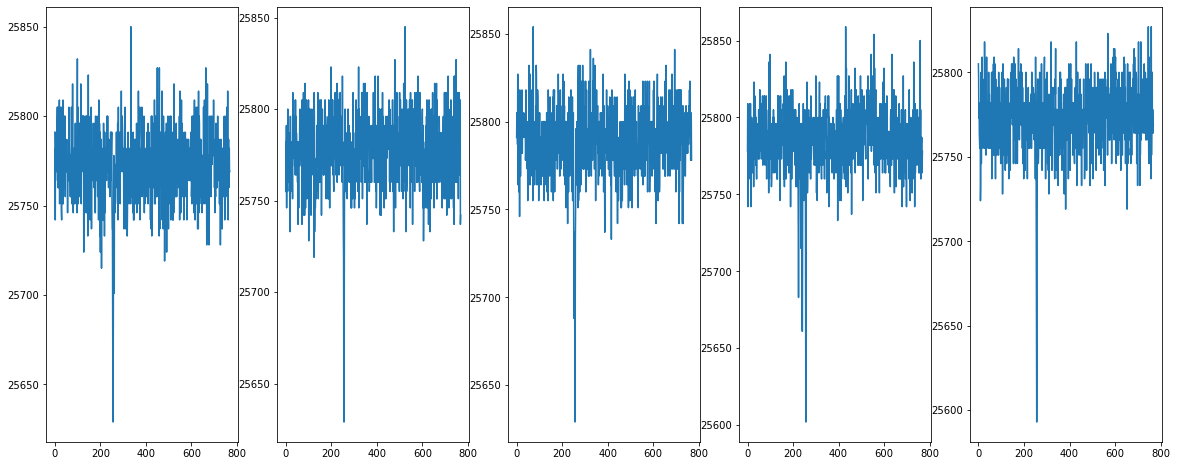

In [10]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

In [11]:
scaler1 = preprocessing.MinMaxScaler()

In [12]:
X = pd.DataFrame(data = scaler1.fit_transform(X.values.T).T, columns = X.columns)

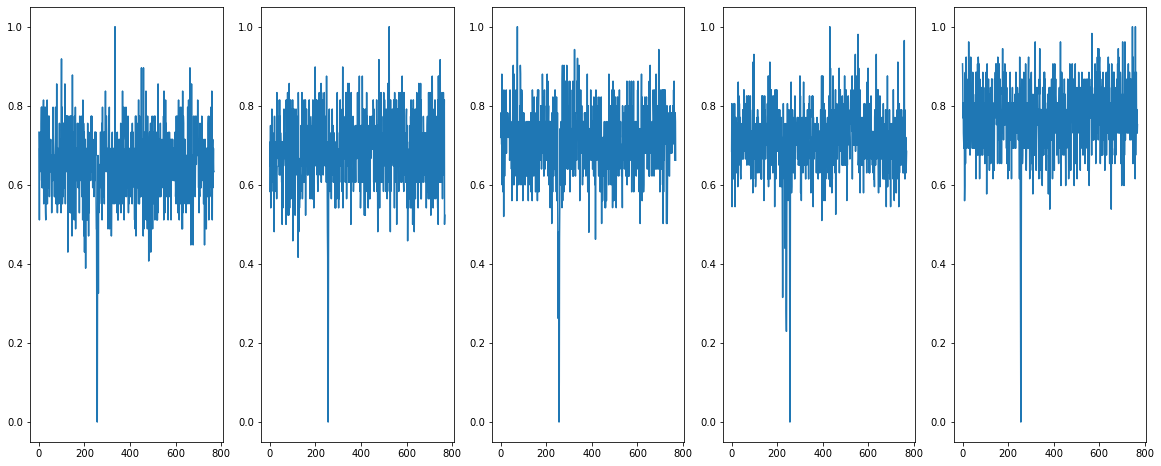

In [13]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

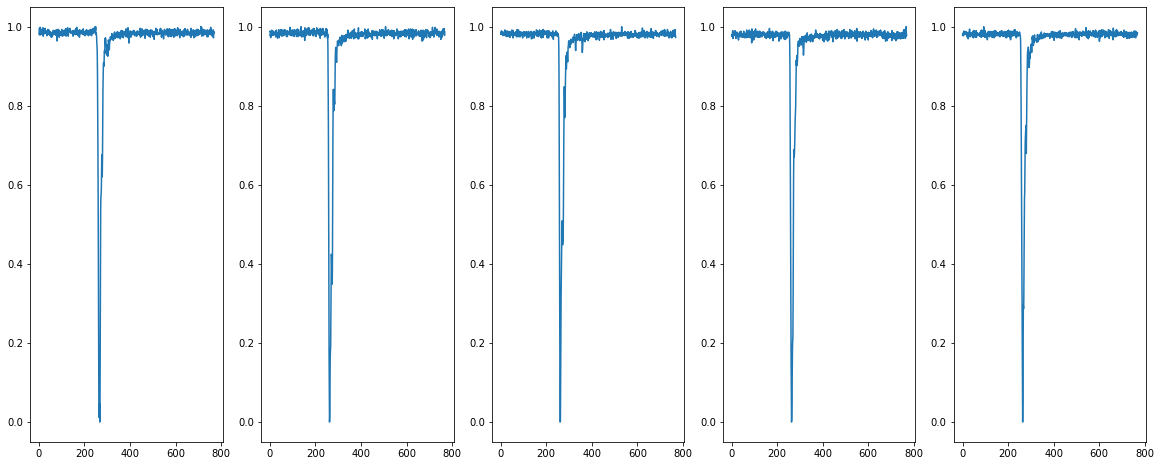

In [14]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 1):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

### Baseline RF

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1, n_jobs=10, random_state=42)

In [15]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True,stratify=y)

In [16]:
clf.fit(train_set,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=10,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
preds=clf.predict(test_set)

In [18]:
print_precision_recall(test_labels, preds)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


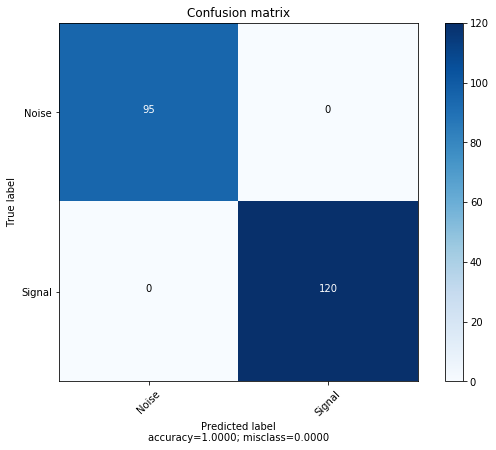

In [19]:
print_cm(test_labels, preds)

In [20]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

In [21]:
xg_reg.fit(train_set,train_labels)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
preds = xg_reg.predict(test_set)

In [23]:
print_precision_recall(test_labels, preds)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


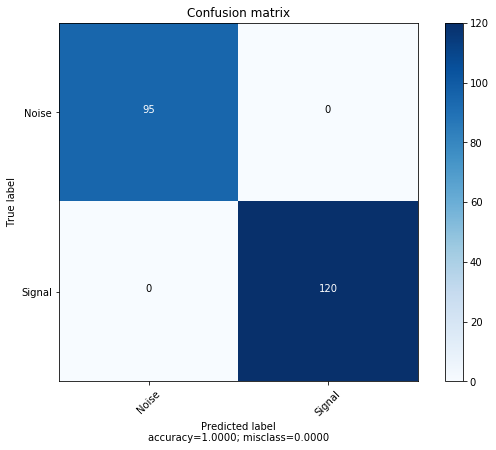

In [24]:
print_cm(test_labels, preds)

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [26]:
clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=42,
  verbose=0)

In [27]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf, X=train_set, y=train_labels, cv=10)

In [28]:
print(all_accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


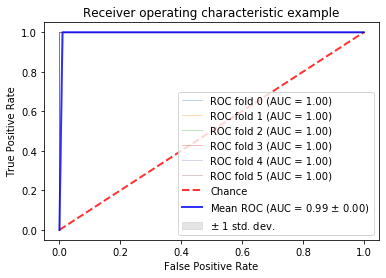

In [29]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline
classifier=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=42,
  verbose=0)
cv = StratifiedKFold(n_splits=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.values[train], y.values[train])
    viz = plot_roc_curve(classifier, X.values[test], y.values[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()



## Provo a classificare con il RF addestrato sugli istogrammi normalizzati i segnali scalati

### Normalize

In [44]:
import uproot4
scaled_positive = uproot4.open("positivi_scalati.root")

len y  822
len y  807
len y  872
len y  829
len y  817


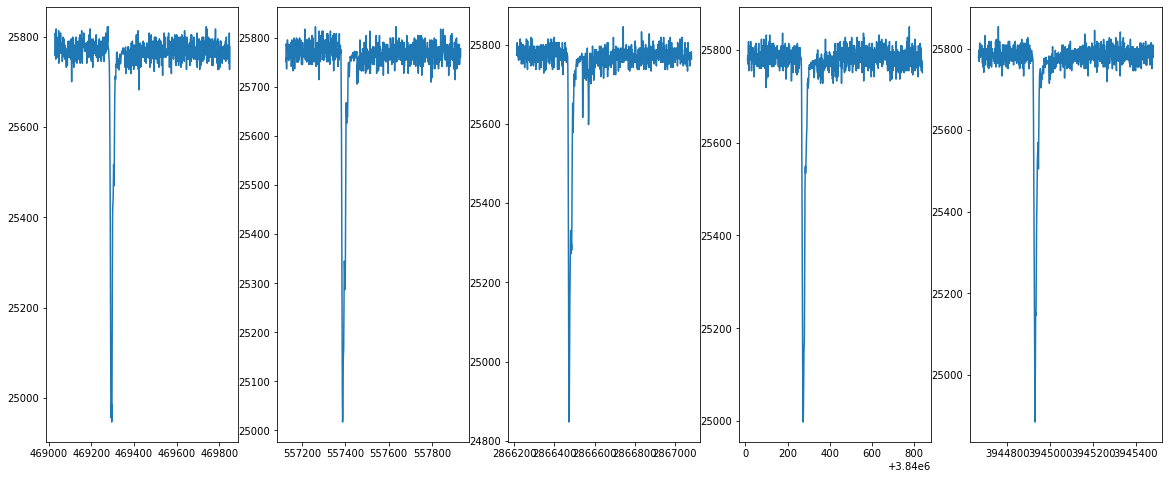

In [45]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for item in scaled_positive.classnames():
    hist=scaled_positive[item]
    X_scaled=hist.to_numpy()[1]
    y_scaled=hist.to_numpy()[0]
    plt.subplot(index)
    plt.plot(X_scaled[:-1],y_scaled)
    print('len y ', len(y_scaled))
    index+=1
    count+=1
    if count==limit: break

In [46]:
list_of_hist = []
for item in scaled_positive.classnames():
    y_scaled=scaled_positive[item].to_numpy()[0]
    list_of_hist.append(y_scaled[0:769])

In [47]:
len(list_of_hist)

1201

In [48]:
scaled_positive=pd.DataFrame(list_of_hist, index=None)

In [49]:
scaled_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Columns: 769 entries, 0 to 768
dtypes: int64(769)
memory usage: 7.0 MB


In [50]:
scaler2 = preprocessing.MinMaxScaler()
scaled_positive = pd.DataFrame(data = scaler2.fit_transform(scaled_positive.values.T).T, columns = scaled_positive.columns)

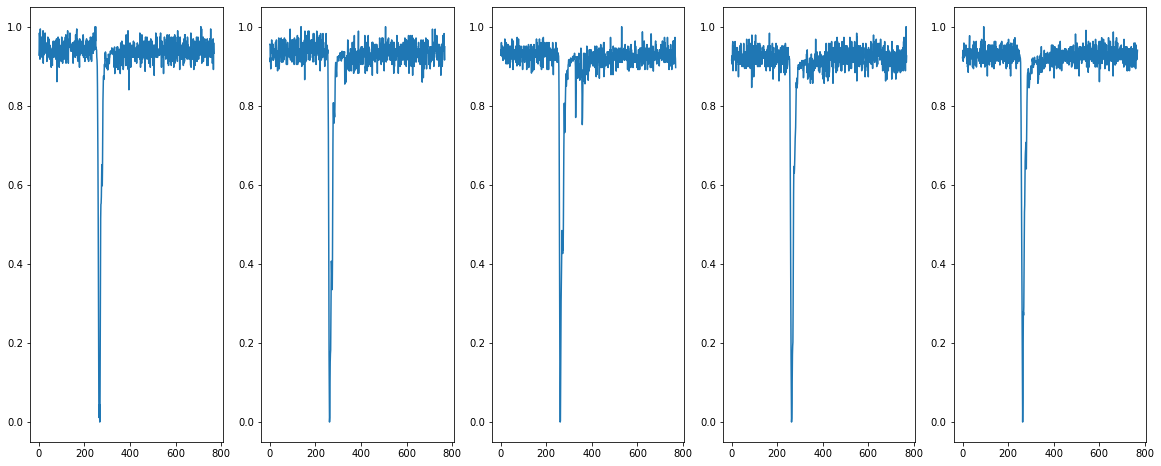

In [51]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2000):
    plt.subplot(index)
    plt.plot(scaled_positive.loc[isto])
    index+=1
    count+=1
    if count==limit: break

### RF Classifier

In [38]:
clf=RandomForestClassifier(n_estimators=500, n_jobs=10, random_state=42)
clf.fit(train_set,train_labels)
preds=clf.predict(scaled_positive)
labels=np.ones(1201)

In [39]:
print_precision_recall(labels, preds)


Accuracy: 0.02

Micro Precision: 0.02
Micro Recall: 0.02
Micro F1-score: 0.02

Macro Precision: 0.50
Macro Recall: 0.01
Macro F1-score: 0.02

Weighted Precision: 1.00
Weighted Recall: 0.02
Weighted F1-score: 0.03


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
len(preds)

1201

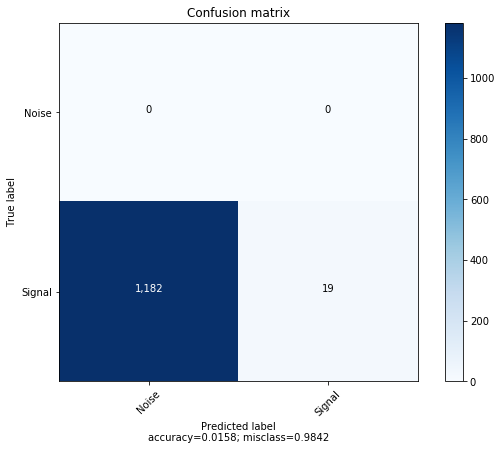

In [41]:
print_cm(labels,preds)

### XGB Classifier

In [42]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001,
                max_depth = 15, alpha = 10, n_estimators = 1000, random_state=42)
xg_reg.fit(train_set,train_labels)
preds = xg_reg.predict(scaled_positive)
labels=np.ones(1201)

In [43]:
print_precision_recall(labels,preds)


Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.50
Macro Recall: 0.11
Macro F1-score: 0.19

Weighted Precision: 1.00
Weighted Recall: 0.23
Weighted F1-score: 0.37


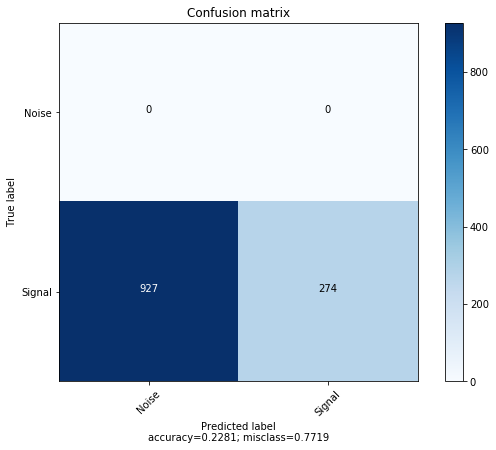

In [44]:
print_cm(labels,preds)

### DNN

In [18]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True,stratify=y)
train_set, val_set, train_labels, val_labels = train_test_split(train_set, train_labels, test_size = 0.20, random_state = 42, stratify = train_labels)

In [47]:
train_set = train_set.values.reshape(train_set.shape[0], train_set.shape[1], 1)
val_set = val_set.values.reshape(val_set.shape[0], val_set.shape[1], 1)
test_set = test_set.values.reshape(test_set.shape[0], test_set.shape[1], 1)
scaled_positive = scaled_positive.values.reshape(scaled_positive.shape[0], scaled_positive.shape[1], 1)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
keras = tf.keras
from tensorflow.keras.layers import Conv1D, Activation, GlobalAveragePooling1D, MaxPooling1D, AveragePooling1D, Dropout, Dense, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from livelossplot import PlotLossesKerasTF

def build_baseline_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    filters = 80
    kernel_size=200
    subsample_length = 2
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=256,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=128,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

#def build_park_model():
#    keras.backend.clear_session()
#    tf.random.set_seed(0)
#    np.random.seed(0)
#    filters = 80
#    kernel_size=200
#    subsample_length = 2
#    model=None
#    model = keras.models.Sequential()
#    model.add(keras.layers.Conv1D(filters, kernel_size, subsample_length, padding = 'same', input_shape=(train_set.shape[1],1))) 
#    model.add(keras.layers.Activation('relu'))
#    model.add(keras.layers.Dropout(0.3))
#    model.add(keras.layers.AveragePooling1D(3, strides=None)) 
#    model.add(Lambda(lambda v: tf.cast(tf.signal.fft(tf.cast(v,dtype=tf.complex64)),tf.float32)))
#    model.add(keras.layers.Conv1D(filters*2, int(kernel_size/2), subsample_length, padding = 'same')) 
#    model.add(keras.layers.Activation('relu'))
#    model.add(keras.layers.Dropout(0.3))
#    model.add(keras.layers.AveragePooling1D(3, strides=None)) 
#    model.add(keras.layers.Conv1D(filters*3, int(kernel_size/4), subsample_length, padding = 'same')) 
#    model.add(keras.layers.Activation('relu'))
#    model.add(keras.layers.Dropout(0.3))
#    model.add(keras.layers.AveragePooling1D(3, strides=None)) 
#    model.add(keras.layers.Flatten())
#    model.add(keras.layers.Dense(units=2800,activation='relu')) #Aggiunto
#    model.add(keras.layers.BatchNormalization())
#    model.add(keras.layers.Dense(units=1400,activation='relu')) #Aggiunto
#    model.add(keras.layers.BatchNormalization())
#    model.add(keras.layers.Dense(units=700,activation='relu'))
#    model.add(keras.layers.BatchNormalization())
#    model.add(keras.layers.Dense(units=70,activation='relu'))
#    model.add(keras.layers.BatchNormalization())
#    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
#
#    optimizer = keras.optimizers.Adam()
#    model.compile(loss='binary_crossentropy',
#                  optimizer=optimizer,
#                  metrics=["accuracy"])
#    return model

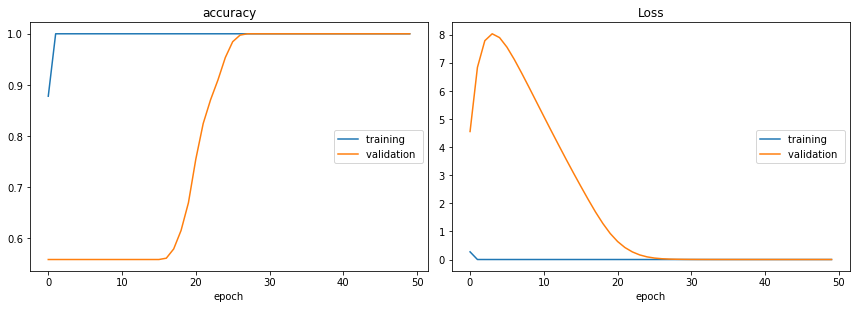

accuracy
	training         	 (min:    0.878, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.273, cur:    0.000)
	validation       	 (min:    0.000, max:    8.031, cur:    0.000)
1547/1547 [==============================] - 0s 315us/sample - loss: 1.3452e-05 - accuracy: 1.0000 - val_loss: 1.4308e-05 - val_accuracy: 1.0000


In [36]:
model=build_baseline_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 200, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")

In [38]:
pred_labels = model.predict(test_set.values)

In [39]:
pred_labels = (pred_labels > 0.5)

In [41]:
print_precision_recall(test_labels,pred_labels)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


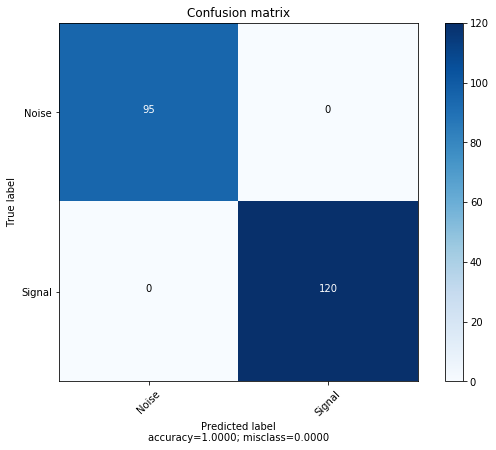

In [42]:
print_cm(test_labels,pred_labels)

In [52]:
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)

In [53]:
pred_labels = (pred_labels > 0.5)
scaled_labels=np.ones(1201)

In [54]:
print_precision_recall(scaled_labels,pred_labels)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00
